In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
import scipy.stats as stats
from scipy.stats import gmean
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline


# 統計学の時間

## ｄｆはtitanicのデータセットを使う

In [126]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## カラムの意味
- PassengerId: 乗客の識別ID
- Survived: 生存フラグ（0=死亡、1=生存）
- Pclass: チケットクラス（1=1等、2=2等、3=3等）
- Name: 乗客の名前
- sex: 性別（male=男性、female=女性）
- Age: 年齢
- SibSp: 兄弟姉妹または配偶者の数
- Parch: 両親または子供の数
- Ticket: チケットの番号
- Fare: チケット価格
- Embarked: 出発港（S=サウサンプトン、C=シェルブール、Q=クイーンズタウン）

In [127]:
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [128]:
# 欠損値の確認
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

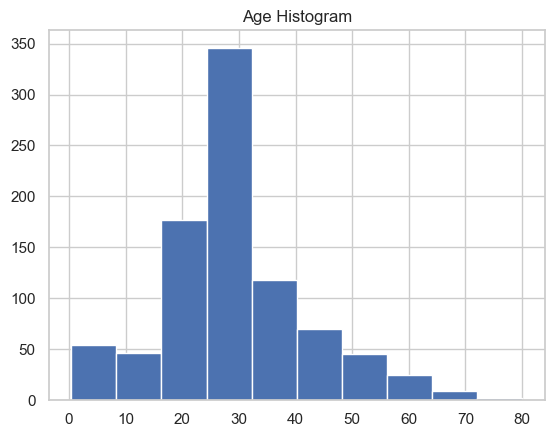

In [129]:
# Ageカラムの欠損値を中央値で埋める
df['age'].fillna(df['age'].median(), inplace=True)

# ヒストグラムをプロット
plt.hist(df['age'])
plt.title('Age Histogram')
plt.show()

## 質的変数をラベルエンコーディングする

In [130]:
# ラベルエンコーダのインスタンスを作成
encoder = LabelEncoder()

# 質的変数をラベルエンコーディング
for col in ['pclass', 'sex', 'embarked', 'class', 'who', 'deck']:
    df[col] = encoder.fit_transform(df[col])

In [131]:
# 質的変数をラベルエンコーディング
for col in ['adult_male', 'embark_town', 'alone']:
    df[col] = encoder.fit_transform(df[col])

In [132]:
# カラムを削除
df = df.drop(['embark_town', 'who', 'adult_male', 'alive'], axis=1)

In [133]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,2,1,22.0,1,0,7.2500,2,2,7,0
1,1,0,0,38.0,1,0,71.2833,0,0,2,0
2,1,2,0,26.0,0,0,7.9250,2,2,7,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0
4,0,2,1,35.0,0,0,8.0500,2,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,2,1,7,1
887,1,0,0,19.0,0,0,30.0000,2,0,1,1
888,0,2,0,28.0,1,2,23.4500,2,2,7,0
889,1,0,1,26.0,0,0,30.0000,0,0,2,1


## 質的変数変数の集計
- もうラベルエンコーディングしちゃったけど

In [134]:
# 性別の集計。男性が1
df['sex'].value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [135]:
# Deckも集計
df['deck'].value_counts()

deck
7    688
2     59
1     47
3     33
4     32
0     15
5     13
6      4
Name: count, dtype: int64

## グラフの描写

In [136]:
print(f"中央値: {df['fare'].median()}")
print(f"平均値: {df['fare'].mean()}")

中央値: 14.4542
平均値: 32.204207968574636


<Axes: >

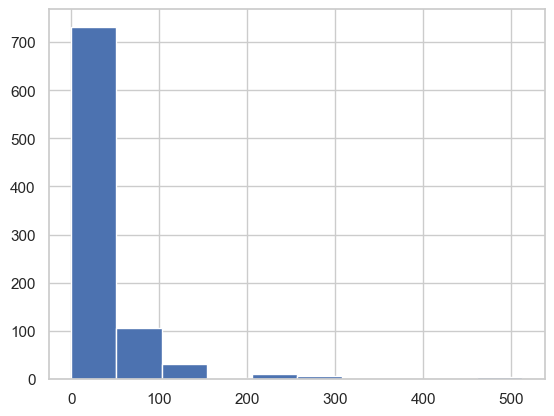

In [137]:
# ヒストグラムを表示します。
df['fare'].hist()

In [138]:
df.groupby("sex")["survived"].mean()

sex
0    0.742038
1    0.188908
Name: survived, dtype: float64

## 度数分布表の作成
- ChatGPTの方が優秀です

In [139]:
# 相対度数の計算、引数をTrueにするだけで分かるなんて
age_counts = df['age'].value_counts()
age_counts

age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [140]:
# 相対度数
age_relative_frequencies = df['age'].value_counts(normalize=True) * 100
age_relative_frequencies

age
28.00    22.671156
24.00     3.367003
22.00     3.030303
18.00     2.918070
19.00     2.805836
           ...    
36.50     0.112233
55.50     0.112233
0.92      0.112233
23.50     0.112233
74.00     0.112233
Name: proportion, Length: 88, dtype: float64

## カラムの意味
- PassengerId: 乗客の識別ID
- Survived: 生存フラグ（0=死亡、1=生存）
- Pclass: チケットクラス（1=1等、2=2等、3=3等）
- Name: 乗客の名前
- Sex: 性別（male=男性、female=女性）
- Age: 年齢
- SibSp: 兄弟姉妹または配偶者の数
- Parch: 両親または子供の数
- Ticket: チケットの番号
- Fare: チケット価格
- Embarked: 出発港（S=サウサンプトン、C=シェルブール、Q=クイーンズタウン）

<Axes: >

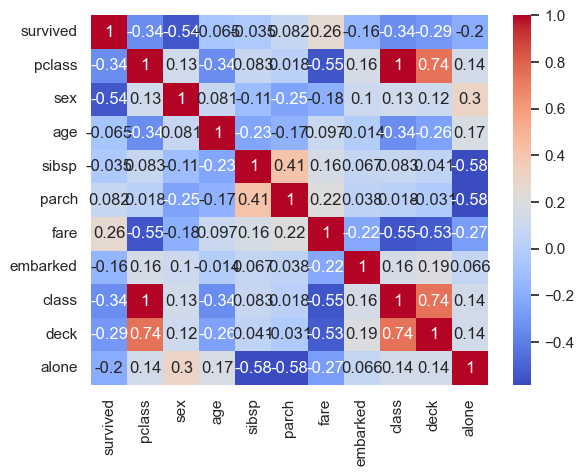

In [141]:
# ヒートマップで相関関係をみてみる
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [142]:
# 累積相対度数
# 相対度数を降順にソートし、累積相対度数を計算する
age_relative_frequencies_sorted = age_relative_frequencies.sort_index(ascending=False)
cumulative_relative_frequencies = age_relative_frequencies_sorted.cumsum()

# 結果を表示する
result_df = pd.DataFrame({
    '年齢': age_relative_frequencies_sorted.index,
    '相対度数': age_relative_frequencies_sorted.values,
    '累積相対度数': cumulative_relative_frequencies.values
})

print(result_df)

       年齢      相対度数      累積相対度数
0   80.00  0.112233    0.112233
1   74.00  0.112233    0.224467
2   71.00  0.224467    0.448934
3   70.50  0.112233    0.561167
4   70.00  0.224467    0.785634
..    ...       ...         ...
83   0.92  0.112233   99.326599
84   0.83  0.224467   99.551066
85   0.75  0.224467   99.775533
86   0.67  0.112233   99.887767
87   0.42  0.112233  100.000000

[88 rows x 3 columns]


In [143]:
# 階級値を求める
# 年齢の階級を定義する
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 階級値を計算する
age_midpoints = [(age_bins[i] + age_bins[i+1]) / 2 for i in range(len(age_bins)-1)]

# 結果を表示する
result_df = pd.DataFrame({
    '階級（年齢）': age_bins[:-1],  # 最後の要素は除外
    '階級値（年齢）': age_midpoints
})

print(result_df)

   階級（年齢）  階級値（年齢）
0       0      5.0
1      10     15.0
2      20     25.0
3      30     35.0
4      40     45.0
5      50     55.0
6      60     65.0
7      70     75.0
8      80     85.0
9      90     95.0


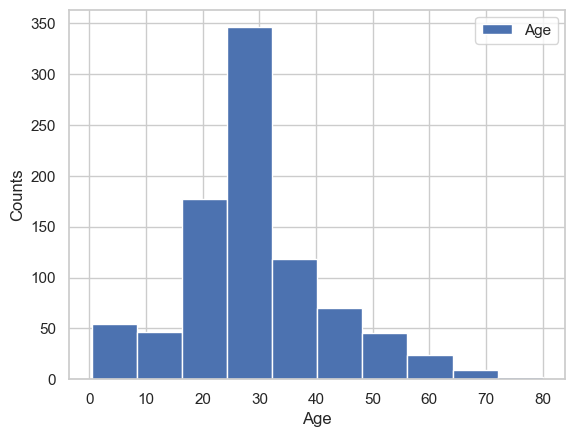

In [144]:
# ヒストグラムを作成
df['age'].hist()

# x軸とy軸に名前を付ける
plt.xlabel('Age')
plt.ylabel('Counts')

# 凡例を追加
plt.legend(['Age'])

# グラフを表示
plt.show()

In [145]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,2,1,22.0,1,0,7.2500,2,2,7,0
1,1,0,0,38.0,1,0,71.2833,0,0,2,0
2,1,2,0,26.0,0,0,7.9250,2,2,7,1
3,1,0,0,35.0,1,0,53.1000,2,0,2,0
4,0,2,1,35.0,0,0,8.0500,2,2,7,1


In [146]:
# 性別とPclass（クラス）を使ってクロス集計する
cross_table = pd.crosstab([df['sex'], df['pclass']], df['survived'], margins=True, margins_name='total')
cross_table


survived        0    1  total
sex   pclass                 
0     0         3   91     94
      1         6   70     76
      2        72   72    144
1     0        77   45    122
      1        91   17    108
      2       300   47    347
total         549  342    891

In [147]:
# 男性と女性の生存者数をそれぞれ取得
male_survivors = df[df['sex'] == 0]['survived'].sum()
female_survivors = df[df['sex'] == 1]['survived'].sum()

# 結果を表示
print(f"男性の生存者数: {male_survivors}")
print(f"女性の生存者数: {female_survivors}")

男性の生存者数: 233
女性の生存者数: 109


## モザイク図の作成

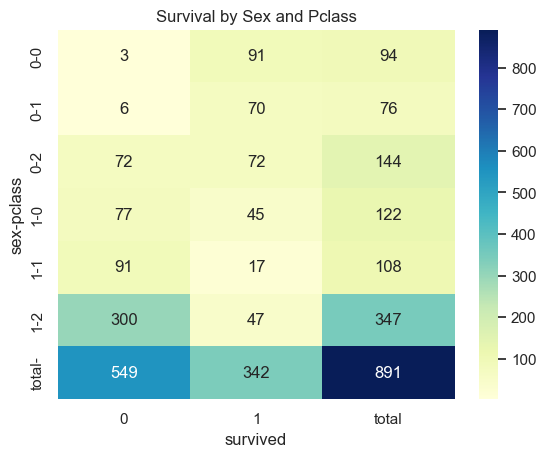

In [148]:
# モザイクプロットの作成
sns.heatmap(cross_table, annot=True, fmt="d", cmap="YlGnBu")

# グラフのタイトルを追加
plt.title("Survival by Sex and Pclass")

# グラフを表示
plt.show()

## 積み上げ棒グラフ

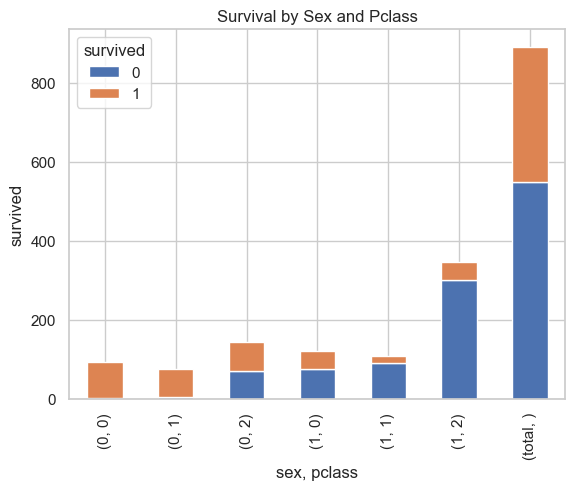

In [149]:
# 積み上げ棒グラフを作成
cross_table.drop('total', axis=1).plot(kind='bar', stacked=True)

# グラフのタイトルと軸ラベルを追加
plt.title('Survival by Sex and Pclass')
plt.xlabel('sex, pclass')
plt.ylabel('survived')

# 凡例を追加
plt.legend(title='survived')

# グラフを表示
plt.show()

## サンプルで時系列のデータセットを作成して積み上げ棒グラフで表現

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-pack

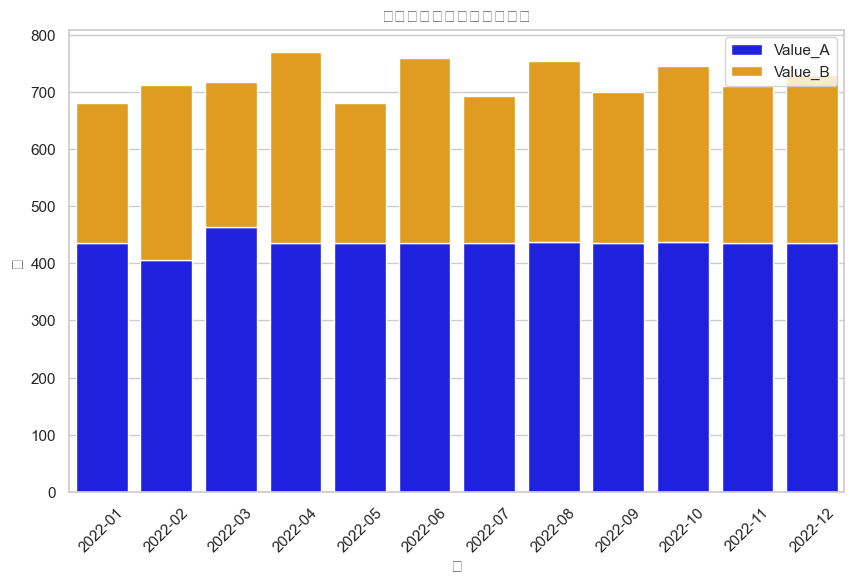

In [150]:
# ダミーの時系列データを作成
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_list = [start_date + timedelta(days=x) for x in range((end_date-start_date).days)]
data = pd.DataFrame({'Date': date_list,
                     'Value_A': [i % 30 for i in range(len(date_list))],
                     'Value_B': [i % 20 for i in range(len(date_list))]})


# 日付を月単位に変換
data['Month'] = data['Date'].dt.to_period('M')

# 月ごとに集計
monthly_data = data.groupby('Month').agg({'Value_A': 'sum', 'Value_B': 'sum'})

# 積み上げ棒グラフを描画
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.barplot(data=monthly_data, x=monthly_data.index, y='Value_A', color='blue', label='Value_A')
sns.barplot(data=monthly_data, x=monthly_data.index, y='Value_B', color='orange', label='Value_B', bottom=monthly_data['Value_A'])

plt.title('月ごとの積み上げ棒グラフ')
plt.xlabel('月')
plt.ylabel('値')
plt.xticks(rotation=45)
plt.legend()

plt.show()


## 東京の気象情報の時系列データセットを利用
- 平均雲量、
- 平均風速、
- 平均気温、
- 最大気温、
- 最低気温、
- 平均降水量

In [151]:
tokyo_df = pd.read_csv("https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv", parse_dates=True, index_col=0)
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0
...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

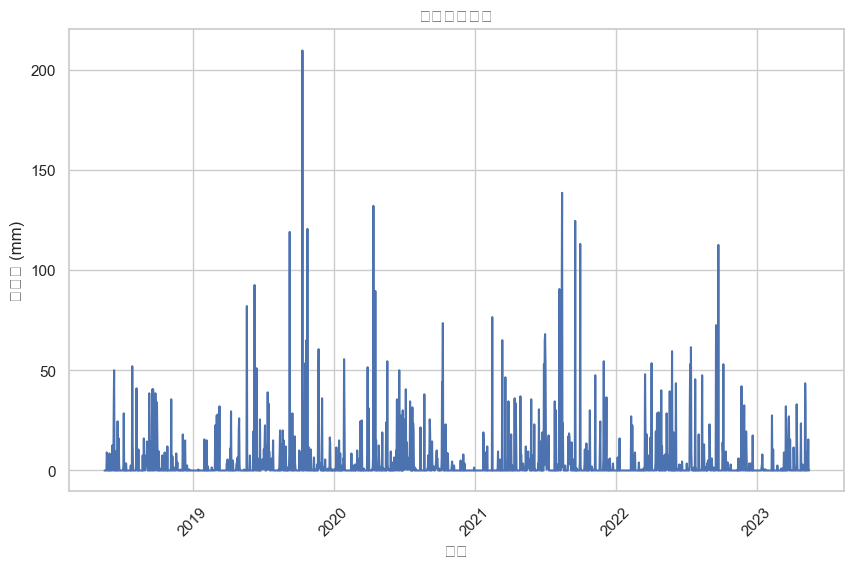

In [152]:
# 折れ線グラフを描画
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.lineplot(x=tokyo_df.index, y=tokyo_df['rain'])

plt.title('東京の降水量')
plt.xlabel('日付')
plt.ylabel('降水量 (mm)')

plt.xticks(rotation=45)
plt.show()

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/s

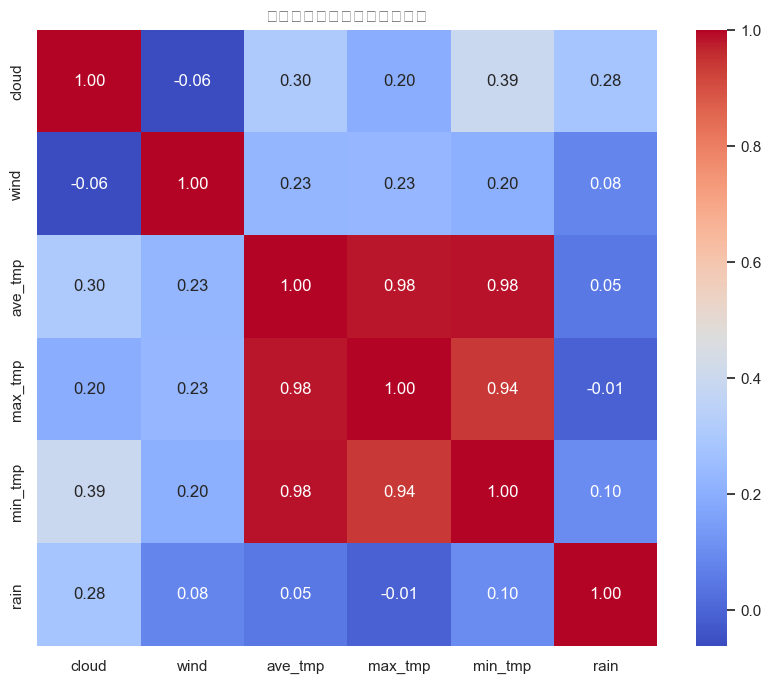

In [153]:
# 共分散を標準化したのが相関関係
tokyo_correlation_matrix = tokyo_df.corr()

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(tokyo_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('東京の気象データの相関関係')
plt.show()

## 折れ線グラフ

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

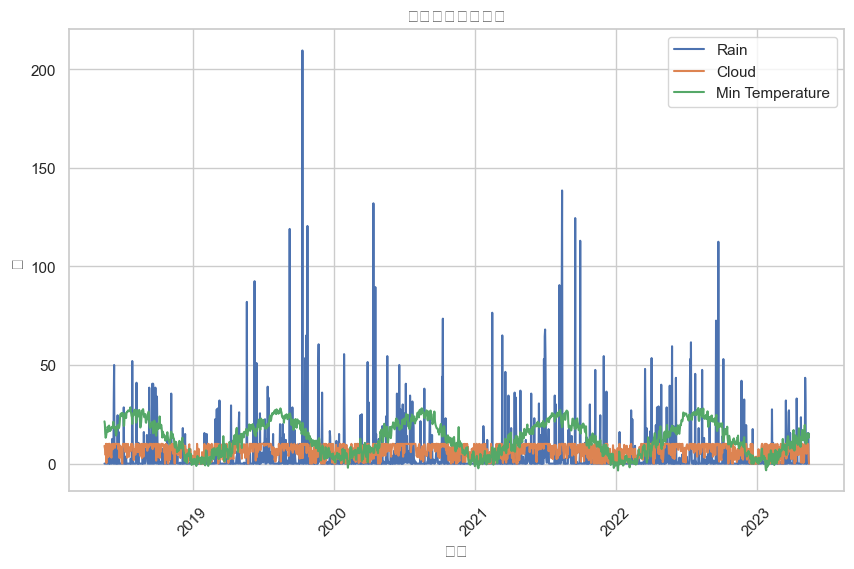

In [154]:
# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['rain'], label='Rain')

# cloudカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['cloud'], label='Cloud')

# min_tmpカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['min_tmp'], label='Min Temperature')

plt.title('東京の気象データ')
plt.xlabel('日付')
plt.ylabel('値')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 時系列データセットのフィルタリング

In [155]:
# 特定の日数だけのデータを抽出する
start_date = pd.to_datetime('2019-09-01')
end_date = pd.to_datetime('2020-11-10')

filtered_tokyo_df = tokyo_df[(tokyo_df.index >= start_date) & (tokyo_df.index <= end_date)]
filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0
...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0


/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

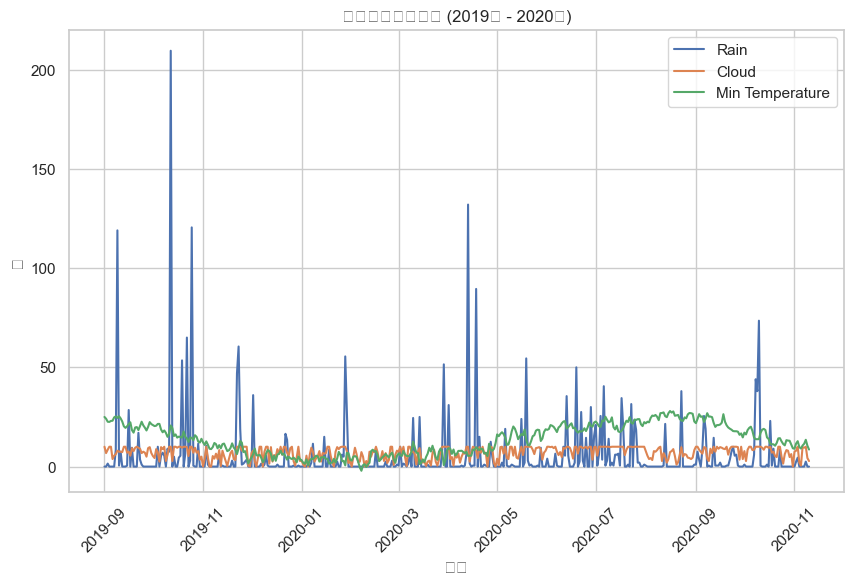

In [156]:
# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['rain'], label='Rain')

# cloudカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['cloud'], label='Cloud')

# min_tmpカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, filtered_tokyo_df['min_tmp'], label='Min Temperature')

plt.title('東京の気象データ (2019年 - 2020年)')
plt.xlabel('日付')
plt.ylabel('値')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 標準化

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/pyth

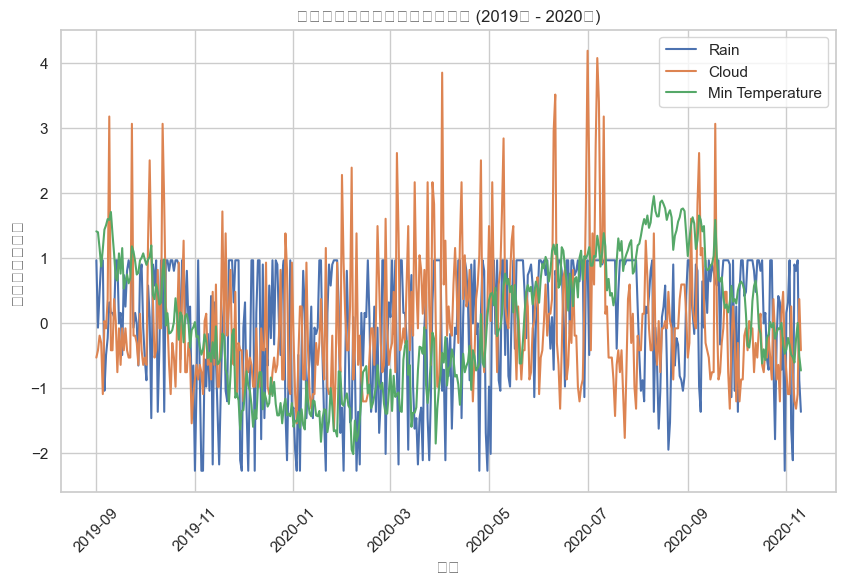

In [157]:
# データを標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_tokyo_df)

# 折れ線グラフを描画
plt.figure(figsize=(10, 6))

# rainカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 0], label='Rain')

# cloudカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 1], label='Cloud')

# min_tmpカラムの折れ線グラフ
plt.plot(filtered_tokyo_df.index, scaled_data[:, 2], label='Min Temperature')

plt.title('標準化された東京の気象データ (2019年 - 2020年)')
plt.xlabel('日付')
plt.ylabel('標準化された値')

plt.xticks(rotation=45)
plt.legend()
plt.show()


## 時系列データセットの差をみる

In [158]:
filtered_tokyo_df['max_tmp']

2019-09-01    32.1
2019-09-02    31.8
2019-09-03    28.5
2019-09-04    26.5
2019-09-05    29.6
              ... 
2020-11-06    16.2
2020-11-07    20.6
2020-11-08    22.4
2020-11-09    18.3
2020-11-10    16.9
Name: max_tmp, Length: 437, dtype: float64

In [159]:
# 前日との気温差のカラムを作成
filtered_tokyo_df['max_tmp_difference'] = filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']

# 特定の列の欠損値を含む列名が 'column_name' と仮定
mean_value = filtered_tokyo_df['max_tmp_difference'].mean()
filtered_tokyo_df['max_tmp_difference'].fillna(mean_value, inplace=True)

filtered_tokyo_df

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_5691/2568499695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tokyo_df['max_tmp_difference'] = filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']
/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_5691/2568499695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tokyo_df['max_tmp_difference'].fillna(mean_value, inplace=True)


,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000
...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000


In [160]:
# 欠損値の確認
missing_values = filtered_tokyo_df.isna().sum()

# 各列ごとの欠損値の数を表示
print(missing_values)

cloud                 0
wind                  0
ave_tmp               0
max_tmp               0
min_tmp               0
rain                  0
max_tmp_difference    0
dtype: int64


In [161]:
filtered_tokyo_df = filtered_tokyo_df.drop(columns=['tmp_difference'])
filtered_tokyo_df

KeyError: "['tmp_difference'] not found in axis"

## 時系列データセットの変化率をみる

In [ ]:
filtered_tokyo_df['max_tmp'].shift(-1) 

2019-09-01    31.8
2019-09-02    28.5
2019-09-03    26.5
2019-09-04    29.6
2019-09-05    32.9
              ... 
2020-11-06    20.6
2020-11-07    22.4
2020-11-08    18.3
2020-11-09    16.9
2020-11-10     NaN
Name: max_tmp, Length: 437, dtype: float64

In [ ]:
# 前日との最高気温の変化率カラムを作成
filtered_tokyo_df['max_temp_change_rate'] = (filtered_tokyo_df['max_tmp'].shift(-1) - filtered_tokyo_df['max_tmp']) / filtered_tokyo_df['max_tmp']
filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference,max_temp_change_rate
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000,-0.009346
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000,-0.103774
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000,-0.070175
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000,0.116981
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000,0.111486
...,...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000,0.271605
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000,0.087379
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000,-0.183036
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000,-0.076503


<Axes: >

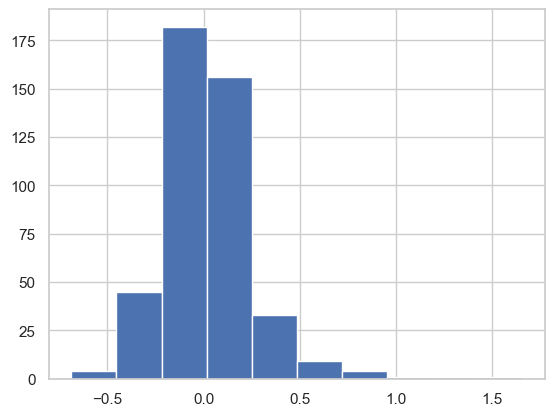

In [ ]:
filtered_tokyo_df['max_temp_change_rate'].hist()

In [ ]:
# 欠損値を中央値で埋める
mean_value = filtered_tokyo_df['max_temp_change_rate'].mean()
filtered_tokyo_df['max_temp_change_rate'].fillna(mean_value, inplace=True)

filtered_tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,max_tmp_difference,max_temp_change_rate
2019-09-01,10.0,2.3,27.7,32.1,25.0,0.0,-0.300000,-0.009346
2019-09-02,6.8,2.4,27.6,31.8,24.1,0.0,-3.300000,-0.103774
2019-09-03,8.5,2.6,25.8,28.5,22.6,1.5,-2.000000,-0.070175
2019-09-04,10.0,2.5,23.7,26.5,22.5,0.0,3.100000,0.116981
2019-09-05,10.0,1.8,25.7,29.6,23.0,0.0,3.300000,0.111486
...,...,...,...,...,...,...,...,...
2020-11-06,9.8,1.7,12.8,16.2,10.6,0.0,4.400000,0.271605
2020-11-07,9.5,1.6,15.5,20.6,11.5,0.0,1.800000,0.087379
2020-11-08,10.0,1.8,17.3,22.4,13.5,2.5,-4.100000,-0.183036
2020-11-09,4.3,3.1,13.5,18.3,10.5,0.0,-1.400000,-0.076503


In [ ]:
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0
...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0


In [ ]:
base_ave_tmp = tokyo_df.loc['2018-05-17', 'ave_tmp']
# ave_tmpの値を2018-05-17の値で割って比率を求める
tokyo_df['ave_tmp_ratio'] = (tokyo_df['ave_tmp'] / base_ave_tmp) * 100
tokyo_df

,cloud,wind,ave_tmp,max_tmp,min_tmp,rain,ave_tmp_ratio
2018-05-17,9.0,3.7,24.0,28.4,21.4,0.0,100.000000
2018-05-18,7.8,3.0,23.4,27.1,20.0,0.0,97.500000
2018-05-19,7.5,3.9,21.5,26.3,15.3,0.0,89.583333
2018-05-20,4.3,3.5,16.8,22.1,13.1,0.0,70.000000
2018-05-21,10.0,2.4,20.3,27.2,13.7,0.0,84.583333
...,...,...,...,...,...,...,...
2023-05-13,10.0,3.0,16.7,18.1,15.4,5.0,69.583333
2023-05-14,10.0,3.6,16.9,21.2,14.3,3.0,70.416667
2023-05-15,9.8,2.0,16.1,18.1,14.6,15.5,67.083333
2023-05-16,2.8,2.6,19.9,27.5,13.1,0.0,82.916667


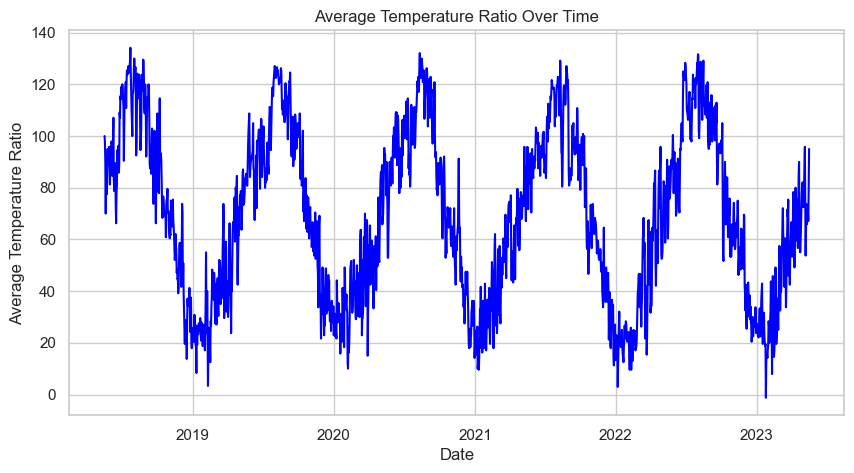

In [ ]:
# グラフのスタイルを設定
sns.set_style('whitegrid')

# 'ave_tmp_ratio'の折れ線グラフを描画
plt.figure(figsize=(10, 5))  # グラフのサイズを設定
sns.lineplot(x=tokyo_df.index, y=tokyo_df['ave_tmp_ratio'], color='blue')

# グラフのタイトルと軸ラベルを追加
plt.title('Average Temperature Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature Ratio')

# グラフを表示
plt.show()

## 最頻値を求める

In [ ]:
tokyo_df['rain'].mode()

0    0.0
Name: rain, dtype: float64

## 四分位数

In [ ]:
# 引数無しだと中央値を返す
tokyo_df['ave_tmp'].quantile([0.25, 0.5, 0.75])

0.25     9.8
0.50    16.6
0.75    22.9
Name: ave_tmp, dtype: float64

In [ ]:
# npだとarrayで返す
np.quantile(tokyo_df['ave_tmp'], [0.25, 0.50, 0.75])

array([ 9.8, 16.6, 22.9])

In [ ]:
# 四分位範囲を求める(Q3 - Q1)
stats.iqr(tokyo_df['ave_tmp'])

13.099999999999998

## 箱ひげ図

{'whiskers': [<matplotlib.lines.Line2D at 0x159ac3350>,
 'caps': [<matplotlib.lines.Line2D at 0x159b97b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x159b96680>],
 'medians': [<matplotlib.lines.Line2D at 0x159bb07e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x159b97990>],
 'means': []}

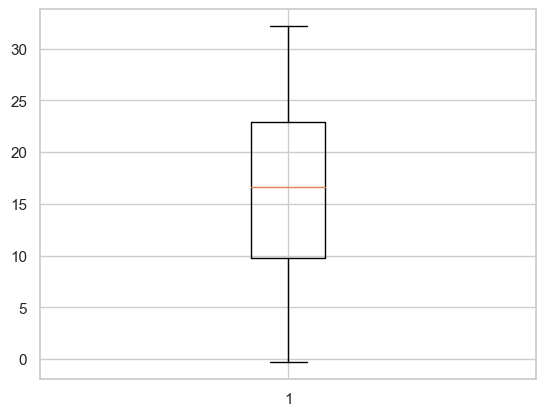

In [ ]:
plt.boxplot(tokyo_df['ave_tmp'])


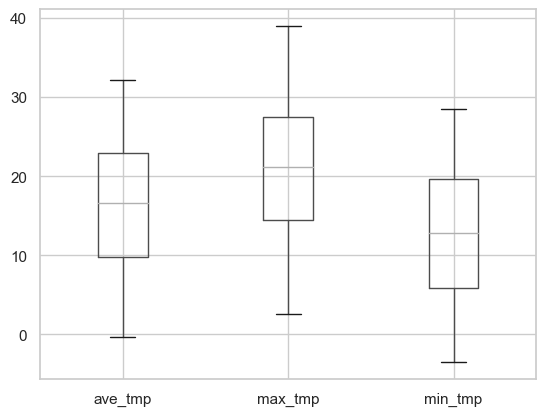

In [ ]:
tokyo_df[['ave_tmp','max_tmp', 'min_tmp']].boxplot()
plt.show()

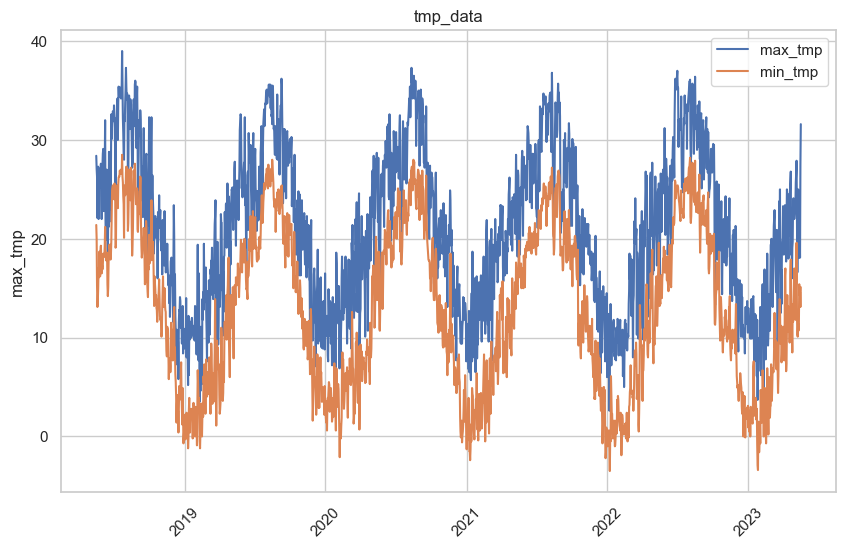

In [ ]:
# max_tmpとmin_tmpの折れ線グラフを作成する
plt.figure(figsize=(10, 6))

# max_tmpカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['max_tmp'], label='max_tmp')

# min_tmpカラムの折れ線グラフ
sns.lineplot(x=tokyo_df.index, y=tokyo_df['min_tmp'], label='min_tmp')

plt.title('tmp_data')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 分散と標準偏差
- ばらつきが大きいほど、「分散」も「標準偏差」も大きな値をとります。

In [162]:
# ハンドで計算_降水量
rain_mean = tokyo_df['rain'].mean()
deviation_list = []
for i in tokyo_df['rain']:
    deviation = i - rain_mean
    num = deviation ** 2
    deviation_list.append(num)

rain_distributed = sum(deviation_list) / len(tokyo_df['rain'])
rain_distributed

194.92785931037258

In [163]:
tokyo_df['rain'].var()

195.03461060243364

## 標準偏差

In [166]:
# mean
rain_mean

4.61767925561029

In [164]:
np.sqrt(rain_distributed)

13.961656753780067

In [165]:
tokyo_df['rain'].std()

13.965479247144856

## 変動係数

In [170]:
# 標準偏差 / 平均
tokyo_df['rain'].std() / rain_mean

3.0243502144886683

In [173]:
print(f"最高気温:{tokyo_df['max_tmp'].std() / tokyo_df['max_tmp'].mean()}")
print(f"最低気温:{tokyo_df['min_tmp'].std() / tokyo_df['min_tmp'].mean()}")

最高気温:0.3733857714831573
最低気温:0.6283596013723152


## レーダーチャート

In [176]:
cat_event_name = {
    '競技名':['ボール投げ', '走り幅跳び', '50m走', '高飛び', '木登り'],
    'くろ':[2, 10, 9, 5, 5],
    'しま':[3, 5, 4, 3, 4],
    'みけ':[4, 6, 5, 8, 10],
}
cat_event_df = pd.DataFrame(cat_event_name)
cat_event_df

,競技名,くろ,しま,みけ
0,ボール投げ,2,3,4
1,走り幅跳び,10,5,6
2,50m走,9,4,5
3,高飛び,5,3,8
4,木登り,5,4,10


# Python3エンジニア認定模擬試験

In [ ]:
import copy

lst1 = [1, [2, 3], 4]
lst2 = list(lst1)
lst3 = copy.deepcopy(lst1)
lst1[1][0] = 'X'

print(lst2[1][0], lst3[1][0])

X 2


In [ ]:
from urllib import parse

# クエリ文字列(&)をパースして、それぞれのkey=valueペアをタプルのリストとして返します。
query = 'key1=value1&key1=value2&key2=value3'
print(parse.parse_qsl(query))

[('key1', 'value1'), ('key1', 'value2'), ('key2', 'value3')]


In [ ]:
[i*j for i in range(3) for j in range(3)]

[0, 0, 0, 0, 1, 2, 0, 2, 4]

In [ ]:
(x for x in range(5) if x % 2 == 0)

<generator object <genexpr> at 0x159a1d4f0>

In [ ]:
# 余りを出力する
[x for x in range(5) if x % 2 == 0]

[0, 2, 4]

In [ ]:
from functools import wraps

def my_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print('calling decorated function')
        return func(*args, **kwargs)
    return wrapper


@my_decorator
def my_decorated_func():
    """this is my decorated func"""
    print('inside function')
    print(my_decorated_func.__name__)
    print(my_decorated_func.__doc__)

my_decorated_func()

calling decorated function
inside function
my_decorated_func
this is my decorated func


## 解説
- os.removedirsは、指定されたディレクトリを削除し、その親ディレクトリが空であれば再帰的に削除します。
この関数は1つのディレクトリパスしか受け取らず、そのディレクトリが空でなければエラーを返します。
したがって、一つのパスしか受け取らない’os.removedirs(‘/path/to/dir’)’が正しい使い方です。

In [ ]:
def attach_custom_dict(**kwargs):
    default_dict = {
        'address': 'tokyo',
    }

    for key, value in kwargs.items():
        default_dict[key] = value
    
    return default_dict

user = { 'name': 'taro', 'age': 20 }
attach_custom_dict(**user)

{'address': 'tokyo', 'name': 'taro', 'age': 20}

In [ ]:
[x*2 for x in [i**2 for i in range(4)]]

[0, 2, 8, 18]

## Blackとは不適切なインデントなどを修正してくれるものです

In [ ]:
def unpacked_dict():
    a, b = {'a': 1, 'b': 2}

    return a, b
print(unpacked_dict())

('a', 'b')


In [2]:
letter = 'diveintoexam'
letter[-8] 

'i'

- 特定の要素がシーケンス内にどれだけ存在するかをカウントする

In [3]:
num_list  = [2, 4, 6, 4, 4, 2, 6]
for i in range(num_list.count(4)):
    print(i, end=' ')

0 1 2 

In [4]:
num_list.count(4)

3

In [6]:
import reprlib
reprlib.repr(set('diveintocode'))

"{'c', 'd', 'e', 'i', 'n', 'o', ...}"

In [7]:
import math
print("出力結果:")
print('円周率は%5.3fである。'%math.pi)

出力結果:
円周率は3.142である。


In [10]:
# まずは魔法の箱（リスト）を作ります
f_name = ["りんご", "バナナ", "みかん"]

# そして、その箱がどんな特技を持っているのかを調べます
dir_f_name = dir(f_name)

# 特技の一覧を表示します
print(dir_f_name)


['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [11]:
import reprlib

# 0から999までの1000個の整数を含む長いリストを作成
long_list = list(range(1000))

# reprlibを使ってリストを短縮表示
short_repr = reprlib.repr(long_list)

print(short_repr)


[0, 1, 2, 3, 4, 5, ...]


In [14]:
d = 'dive\ninto\ncode\t'

print(len(d))

15


In [16]:
print("Hello\tWorld!")


Hello	World!


In [17]:
print(range(5))

range(0, 5)


- pop関数について解説を入れてください

In [21]:
numbers = [1, 2, 3, 4, 5]
popped_value = numbers.pop(2)
print(popped_value)  # 3を表示
print(numbers)  # [1, 2, 4, 5]を表示


3
[1, 2, 4, 5]


In [22]:
dictionary = {'a': 1, 'b': 2, 'c': 3}
popped_value = dictionary.pop('b')
print(popped_value)  # 2を表示
print(dictionary)  # {'a': 1, 'c': 3}を表示


2
{'a': 1, 'c': 3}


In [19]:
print("出力結果:")
try:
    raise Exception("開始前","Exception発生")
    print("開始")
except IOError as msg:
    print("IOError発生:",msg.args[0])
except Exception as msg:
    print("予期せぬ問題発生:",msg.args[1])
else:
    print("Else表示")

出力結果:
予期せぬ問題発生: Exception発生


In [20]:
i = 10

def num(arg=i):
    print(arg)

i = 7

num()

10


## list(zip(*result))の＊で転置ができる

In [23]:
a = [1, 2, 3]
b = ['a', 'b', 'c']
result = list(zip(a, b))
print(result)  # [(1, 'a'), (2, 'b'), (3, 'c')]


[(1, 'a'), (2, 'b'), (3, 'c')]


In [25]:
a = [1, 2, 3]
b = ['a', 'b', 'c']
result = list(zip(a, b))
print(list(zip(*result))) 

[(1, 2, 3), ('a', 'b', 'c')]


## ユニークな文字列(重複しない文字列)を返す

In [26]:
import reprlib
reprlib.repr(set('diveintocode'))

"{'c', 'd', 'e', 'i', 'n', 'o', ...}"

In [27]:
print(list(range(5)))

[0, 1, 2, 3, 4]


- どうやら引っ掛け問題のようだったみたい

In [29]:
print(range(5))

range(0, 5)


## 浮動小数点をしていするフォーマット

In [28]:
pi = 3.14159
formatted_string = "%5.3f" % pi
print(formatted_string)  # "3.142"と出力される


3.142


In [30]:
import reprlib
reprlib.repr(set('diveintocode'))

"{'c', 'd', 'e', 'i', 'n', 'o', ...}"

In [34]:
num_list  = [2, 4, 6, 4, 4, 2, 6]
for i in range(num_list.count(4)):
    print(i, end=' ')

0 1 2 

In [40]:
class MyError(Exception):
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return repr(self.value)

def some_function(x):
    if x < 0:
        raise MyError("Negative value detected!")
    return x * 2

try:
    result = some_function(100)
except MyError as e:
    print(f"Caught an error: {e}")

try:
    result = some_function(10)
    print(f"Result: {result}")
except MyError as e:
    print(f"Caught an error: {e}")


Result: 20


In [41]:
num_list  = [2, 4, 6, 4, 4, 2, 6]
for i in range(num_list.count(4)):
    print(i, end=' ')

0 1 2 

In [43]:
# あいさつ文を表示します。　…【A】
x = 'Hello' # Helloを変数に代入します。　…【B】
# Worldを変数に　…【C】
               # 代入します。　…【D】
y = 'World !' 
print ('{}!{}!! #あいさつ文はここまでです。'.format(x, y))


Hello!World !!! #あいさつ文はここまでです。


In [44]:
a = 10
b = a ** 2
c = b % 20 + 5 # 余りを計算
d = 8 
e = d / b 
f = d // c # 除算
print ('{0}, {1}'.format(e, f))

0.08, 1


In [49]:
print(f'除算:{7 // 3}')
print(f'割り算:{7 / 3}')


除算:2
割り算:2.3333333333333335


In [50]:
Zen = 'SimpleIsBetterThanComplex'

In [51]:
Zen[5:1000]

'eIsBetterThanComplex'

In [52]:
Zen[:1000]

'SimpleIsBetterThanComplex'

In [53]:
Zen[:]

'SimpleIsBetterThanComplex'

In [55]:
Zen = 'SimpleIsBetterThanComplex'
# 最初の文字を 'J' に置き換えた新しい文字列を作成
new_Zen = 'J' + Zen[1:]

print(new_Zen)


JimpleIsBetterThanComplex


In [56]:
Zen = 'SimpleIsBetterThanComplex'
Zen = Zen.replace('i', 'a')

print(Zen)


SampleIsBetterThanComplex


In [57]:
Zen = 'SimpleIsBetterThanComplex'
Zen = Zen.replace('i', 'a', 1)  # 3番目の引数で置き換える回数を指定

print(Zen)


SampleIsBetterThanComplex


In [58]:
colors = ['red', 'green', 'blue']
colors.append('yellow')
colors.insert(0,'purple')
for color in colors[2:]:
    print(color, len(color), end = ', ')

green 5, blue 4, yellow 6, 

In [59]:
colors

['purple', 'red', 'green', 'blue', 'yellow']

In [63]:
for n in range(2, 10):
    for x in range(2 ,n): # (2, 2)は実行されずすぐにelseへ移動する
        if n % x == 0:
            print(n, 'equals', x, '*', n//x)
            
    else:
        print(n,'is a prime number')
        continue
    break

2 is a prime number
3 is a prime number
4 equals 2 * 2
4 is a prime number
5 is a prime number
6 equals 2 * 3
6 equals 3 * 2
6 is a prime number
7 is a prime number
8 equals 2 * 4
8 equals 4 * 2
8 is a prime number
9 equals 3 * 3
9 is a prime number


In [62]:
for n in range(2, 10):
    for x in range(2 ,n): # n - 1ってっことですね
        print(f'n:{n}, x:{x}')

n:3, x:2
n:4, x:2
n:4, x:3
n:5, x:2
n:5, x:3
n:5, x:4
n:6, x:2
n:6, x:3
n:6, x:4
n:6, x:5
n:7, x:2
n:7, x:3
n:7, x:4
n:7, x:5
n:7, x:6
n:8, x:2
n:8, x:3
n:8, x:4
n:8, x:5
n:8, x:6
n:8, x:7
n:9, x:2
n:9, x:3
n:9, x:4
n:9, x:5
n:9, x:6
n:9, x:7
n:9, x:8


In [64]:
for n in range(2, 10):
    for x in range(2, n): 
        if n % x == 0:
            print(n, 'equals', x, '*', n // x)
            break
    else:  # 'else' belongs to the 'for' loop, not 'if'
        # It executes when the loop is not terminated by 'break'
        print(n, 'is a prime number')


2 is a prime number
3 is a prime number
4 equals 2 * 2
5 is a prime number
6 equals 2 * 3
7 is a prime number
8 equals 2 * 4
9 equals 3 * 3


In [65]:
i = 5 
i = 6 

def f(arg = i): 
    i = 7 
    print(arg)

i = 8 
i = 9 

In [66]:
f()

6


In [67]:
f(i)

9


In [68]:
f(arg=200)

200


In [69]:
cubes = []
for x in range(5):
    cubes.append(x ** 3)

print(cubes)

[0, 1, 8, 27, 64]


In [70]:
cubes = [x ** 3 for x in range(5)]

In [71]:
# 偶数のみの平方をリストに格納する内包表記
squares_of_evens = [x**2 for x in range(10) if x % 2 == 0]
print(squares_of_evens)


[0, 4, 16, 36, 64]


In [72]:
# 任意の文字列リストがあるとき、5文字以上の単語だけを大文字にして新しいリストを作成する内包表記
words = ["hello", "world", "python", "is", "awesome"]
uppercase_long_words = [word.upper() for word in words if len(word) >= 5]
print(uppercase_long_words)


['HELLO', 'WORLD', 'PYTHON', 'AWESOME']


In [75]:
num = [x ** 3 for x in range(51) if x % 3 == 0]
print(num)

[0, 27, 216, 729, 1728, 3375, 5832, 9261, 13824, 19683, 27000, 35937, 46656, 59319, 74088, 91125, 110592]


In [76]:
cubed_roots = [x ** (1/3) for x in range(51) if x % 3 == 0]
print(cubed_roots)


[0.0, 1.4422495703074083, 1.8171205928321397, 2.080083823051904, 2.2894284851066637, 2.46621207433047, 2.6207413942088964, 2.7589241763811203, 2.8844991406148166, 3.0, 3.1072325059538586, 3.207534329995826, 3.3019272488946263, 3.3912114430141664, 3.4760266448864496, 3.5568933044900626, 3.634241185664279]


In [77]:
cubed_roots = [round(x ** (1/3)) for x in range(51) if x % 3 == 0]
print(cubed_roots)


[0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4]


In [79]:
words = ['apple', 'banana', 'apricot', 'cherry', 'avocado']
capitalized_a_words = [word.upper() for word in words if word.startswith('a')]

print(capitalized_a_words)


['APPLE', 'APRICOT', 'AVOCADO']


In [80]:
matrix = [[2, 3, 5], [4, 9, 25], [8, 27, 125]]
power = [row[2] for row in matrix]
print(power)

[5, 25, 125]


In [82]:
from collections import deque
queue = deque(["bear", "cow", "dog", "elephant", "fox"])
queue.append("goat")  # "goat" を末尾に追加
queue.popleft()       # "bear" を先頭から削除
queue.pop()           # 追加した "goat" を末尾から削除
print(queue)


deque(['cow', 'dog', 'elephant', 'fox'])


In [83]:
from collections import deque

# タスクキューの作成
task_queue = deque()

# タスクの追加
task_queue.append('Task1')
task_queue.append('Task2')
task_queue.append('Task3')

# タスクの処理
while task_queue:
    current_task = task_queue.popleft()
    print(f'Processing {current_task}')


Processing Task1
Processing Task2
Processing Task3


In [86]:
# アルファベット順に基づいて比較しているためTrueとなる
'PHP' < 'Perl' < 'Python'

True

In [88]:
import sys
print(sys.argv[0:4])


['/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001']


In [89]:
import statistics
data = [1, 10, 15, 20, 25, 30, 35]
rslt1 = statistics.mean(data)      # 平均値
rslt2 = statistics.median(data)    # 中央値
rslt3 = statistics.variance(data)  # 分散
print(f'平均値:{rslt1}, 中央値:{rslt2}, 分散:{rslt3}')


平均値:19.428571428571427, 中央値:20, 分散:138.95238095238096


In [90]:
text = (
    "Usage: "
    "-h help"
    " -v version"
)
print(text)


Usage: -h help -v version


- 三重引用符で囲まれた範囲の文字列は、改行を含めてそのままの形で文字列として扱われます。

In [91]:
text = """spam
ham
eggs"""
print(text)


spam
ham
eggs


In [93]:
# 7文字の幅に右詰め
price = 15000
print(f"価格:{price:7d}")


価格:  15000


In [94]:
score = 82.5
print(f"得点:{score:8.1f}")


得点:    82.5


In [95]:
x = 300
y = 150
z = 200
print("spam: {0}, ham: {1}, eggs: {2}".format(x, y, z))


spam: 300, ham: 150, eggs: 200


In [97]:
x = 300
y = 150
z = 200
print("spam: {}, ham: {}, eggs: {}".format(x, y, z))


spam: 300, ham: 150, eggs: 200


In [98]:
x = 300
y = 150
z = 200
print("spam: {a}, ham: {b}, eggs: {c}".format(a=x, b=y, c=z))


spam: 300, ham: 150, eggs: 200


In [99]:
# ベースとなるメッセージテンプレート
base_message = "Dear {name}, your {item} is ready for {action}."

# ユーザーの情報とアクション
user_name = "Alice"
item = "order"
actions = ["pickup", "delivery"]

# ユーザーが選択したアクションに基づいてメッセージを構築
for action in actions:
    print(base_message.format(name=user_name, item=item, action=action))


Dear Alice, your order is ready for pickup.
Dear Alice, your order is ready for delivery.


In [100]:
user_name = "Alice"
item = "order"
actions = ["pickup", "delivery"]

for action in actions:
    message = f"Dear {user_name}, your {item} is ready for {action}."
    print(message)


Dear Alice, your order is ready for pickup.
Dear Alice, your order is ready for delivery.


In [101]:
def num(value):
    return value

value1 = num(0) and num(1) and num(2)
value2 = num(0) or num(1) or num(2)
print(value1, value2)


0 1


In [102]:
for i, c in enumerate("WORD"):
    if i == 2:
        print(c)


R


In [103]:
for i, c in enumerate("WORD"):
    print(i, c)


0 W
1 O
2 R
3 D


In [104]:
len('word')

4

In [105]:
def function(number, default_arg_list=[]):
    default_arg_list.append(number)
    return default_arg_list

print(function(1))
print(function(2, [3, 4]))
print(function(3))
print(function(4, [5, 6]))
print(function(5))


[1]
[3, 4, 2]
[1, 3]
[5, 6, 4]
[1, 3, 5]


In [107]:
def function(name, *args, **kwargs):
    print(name)
    print(args)
    print(kwargs)

function("spam", "ham", kwarg1="eggs", kwarg2="spamhamneggs")


spam
('ham',)
{'kwarg1': 'eggs', 'kwarg2': 'spamhamneggs'}


In [108]:
def function(name, *args, **kwargs):
    print(name)
    print(args)
    print(kwargs)

function("apple", "spam", kwarg3="orange", kwarg4="banana")


apple
('spam',)
{'kwarg3': 'orange', 'kwarg4': 'banana'}


In [109]:
func = lambda a, b: (b + 1, a * 2) # ここのリストの順番を意識して回答する

x, y = 1, 2
x, y = func(x, y)
print(x, y)

3 2


In [110]:
num_func = lambda x, y: x * y
num_func(2,5)

10

In [112]:
import calendar as cal


cal.calendar(2023)

'                                  2023\n\n      January                   February                   March\nMo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su\n                   1             1  2  3  4  5             1  2  3  4  5\n 2  3  4  5  6  7  8       6  7  8  9 10 11 12       6  7  8  9 10 11 12\n 9 10 11 12 13 14 15      13 14 15 16 17 18 19      13 14 15 16 17 18 19\n16 17 18 19 20 21 22      20 21 22 23 24 25 26      20 21 22 23 24 25 26\n23 24 25 26 27 28 29      27 28                     27 28 29 30 31\n30 31\n\n       April                      May                       June\nMo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su\n                1  2       1  2  3  4  5  6  7                1  2  3  4\n 3  4  5  6  7  8  9       8  9 10 11 12 13 14       5  6  7  8  9 10 11\n10 11 12 13 14 15 16      15 16 17 18 19 20 21      12 13 14 15 16 17 18\n17 18 19 20 21 22 23      22 23 24 25 26 27 28      19 20 21 22 23 24 25\n24 25 26

In [115]:
class Duck:
    # クラス変数familyの定義
    family = "Anatidae"

    # 特殊メソッド__init__の定義
    def __init__(self):
        # インスタンス変数birdsongの定義
        self.birdsong = "quack"

def show_family(self):
        print(self.birdsong)
        return f"Ducks belong to the family {self.family}."


In [116]:
duck = Duck()
duck.show_family()

quack


'Ducks belong to the family Anatidae.'

In [121]:
import os


print(os.getcwd())

/Users/kimuratoshiyuki/Dropbox/Python/spotify関連


In [120]:
import os

def change_directory(path):
    try:
        # Change the current working directory to the specified path
        os.chdir(path)
        print(f"Successfully changed the working directory to {path}")
    except OSError as error:
        print(f"Error: {error}")

# Example usage of the function
path = '/Users/kimuratoshiyuki/Dropbox/Python/spotify関連' # Replace with the actual path you want to use
change_directory(path)


Successfully changed the working directory to /Users/kimuratoshiyuki/Dropbox/Python/spotify関連


In [122]:
change_directory('/Users/kimuratoshiyuki/Dropbox/Python/stats')

Successfully changed the working directory to /Users/kimuratoshiyuki/Dropbox/Python/stats


In [124]:
os.getcwd()

'/Users/kimuratoshiyuki/Dropbox/Python/stats'

In [2]:
import random

# 0から9までの範囲で、重複しないランダムな数字のリストを生成します
random_num = random.sample(range(10), 10)

len(random_num)


10

In [132]:
# 0から9までの数値からランダムに10個選ぶことで、重複を許したランダムな数値のリストを生成します
random_num = [random.randint(0, 9) for _ in range(10)]

len(random_num)


10

In [4]:
random.random() - 1

-0.20784847344402735

In [5]:
random.random() * 2 -1

-0.17179808361676185

In [9]:
from datetime import date

dt1 = date(2022,1,1)
dt2 = date(2023,2,2)
diff = dt2 - dt1
diff

datetime.timedelta(days=397)

In [14]:
import pprint


lines = [f'sample test string {i:04}' for i in range(3)]

In [17]:
print(lines)

['sample test string 0000', 'sample test string 0001', 'sample test string 0002']


In [16]:
# 1行が80文字を超えると改行してくれる
pprint.pprint(lines)

['sample test string 0000',
 'sample test string 0001',
 'sample test string 0002']


In [21]:
import unittest

class TestSample(unittest.TestCase):
    def calc(self,x,y):
        return x * y
    
    def test_it(self):
        actual = self.calc(2, 3)  # 6 を返す
        expected = 5
        self.assertEqual(actual, expected)



- テキスト第一回目点数

In [22]:
# Total number of questions
total_questions = 40

# Number of questions answered incorrectly
incorrect_answers = 8

# Number of questions answered correctly
correct_answers = total_questions - incorrect_answers

# Assuming each question carries equal weight and the total score is 100
score_per_question = 100 / total_questions

# Calculating the total score
total_score = correct_answers * score_per_question
print(total_score)


80.0


In [23]:
default_name = "Taro"  # 1

def hello1(name=default_name):  # 2
    return f"Hello {name}."

def hello2(name=None):  # 3
    if name is None:  # 4
        name = default_name  # 5
    return f"Hello {name}."

default_name = "Hanako"  # 6
print(hello1(), hello2())  # 7


Hello Taro. Hello Hanako.


In [24]:
class Greeter:
    default_name = "Yamada"

    def __init__(self, name=None):
        self.name = name if name is not None else Greeter.default_name

    def greet(self):
        print(f"Hello, {self.name}!")

# クラス変数 default_name を変更
Greeter.default_name = "Suzuki"

g1 = Greeter()
g2 = Greeter("Tanaka")

g1.greet() # 出力1
g2.greet() # 出力2

# インスタンスg1のnameを変更
g1.name = "Kobayashi"

g1.greet() # 出力3
g2.greet() # 出力4


Hello, Suzuki!
Hello, Tanaka!
Hello, Kobayashi!
Hello, Tanaka!


In [25]:
def test(val):
    print(f"test({val}) called")
    return val

x = 0
y = 1
z = 2

result1 = test(x) and test(y)
result2 = test(y) or test(x)
result3 = test(x) and test(z)
result4 = test(z) or test(x)
result5 = (test(x) and test(y)) or test(z)

print("Results:", result1, result2, result3, result4, result5)


test(0) called
test(1) called
test(0) called
test(2) called
test(0) called
test(2) called
Results: 0 1 0 2 2


In [26]:
class Duck:
    family = "Anatidae"

    def __init__(self):
        self.birdsong = "quack"

    def show_family(self):
        return f"The duck belongs to the {self.family} family."


In [28]:
duck = Duck()
duck.show_family()

'The duck belongs to the Anatidae family.'

In [31]:
class Bird:
    bird_class = "Aves"

    def __init__(self, sound):
        self.call = sound

    def describe_call(self):
        return f"This bird's call is {self.call}."


In [33]:
bird = Bird('brra')

In [35]:
bird.bird_class = 'dr.bird'

In [37]:
bird.describe_call()

"This bird's call is brra."

In [38]:
class Car:
    category = "Vehicle"

    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year
        self.odometer_reading = 0  # 走行距離は新車の場合0からスタート

    def get_descriptive_name(self):
        """車に関する簡単な記述を返す"""
        long_name = f"{self.year} {self.make} {self.model}"
        return long_name.title()

    def read_odometer(self):
        """車の走行距離を表示する"""
        print(f"This car has {self.odometer_reading} miles on it.")

    def update_odometer(self, mileage):
        """
        走行距離計に値を設定する。
        走行距離計を減らすことはできない。
        """
        if mileage >= self.odometer_reading:
            self.odometer_reading = mileage
        else:
            print("You can't roll back an odometer!")

    def increment_odometer(self, miles):
        """走行距離計の値を指定されたマイルだけ増やす"""
        self.odometer_reading += miles


In [39]:
# 車のインスタンスを作成
my_new_car = Car('subaru', 'outback', 2023)

# 車の記述を表示
print(my_new_car.get_descriptive_name())

2023 Subaru Outback


In [40]:
# 走行距離を読み取る
my_new_car.read_odometer()

# 走行距離計を更新する
my_new_car.update_odometer(23)
my_new_car.read_odometer()

# 走行距離計を増やす
my_new_car.increment_odometer(100)
my_new_car.read_odometer()


This car has 0 miles on it.
This car has 23 miles on it.
This car has 123 miles on it.


In [41]:
import re

s = "tic tac tac toe"
print(re.sub(r"([a-z]+) \1", r"\1", s))


tic tac toe


In [46]:
import re

text = "Cat sat on the mat."
pattern = "at" # 置き換えたい文字列
replacement = "[at]" # 実際に置き換える文字

result = re.sub(pattern, replacement, text)
print(result)


C[at] s[at] on the m[at].


In [43]:
type(result)

str

In [47]:
import re

text = "Agent Smith knocked on the door. Agent Johnson watched the windows."
pattern = r"Agent (\w+)\b"
replacement = "Agent [REDACTED]"

result = re.sub(pattern, replacement, text)
print(result)


Agent [REDACTED] knocked on the door. Agent [REDACTED] watched the windows.


In [48]:
import re

text = """
INFO: User JohnDoe has logged in at 10:45 AM.
ERROR: Invalid password attempt by JaneSmith at 11:02 AM.
INFO: User JohnDoe has logged out at 11:15 AM.
"""
pattern = r"User (\w+)\b"
replacement = "User [USERNAME]"

result = re.sub(pattern, replacement, text)
print(result)



INFO: User [USERNAME] has logged in at 10:45 AM.
ERROR: Invalid password attempt by JaneSmith at 11:02 AM.
INFO: User [USERNAME] has logged out at 11:15 AM.



In [50]:
import re

text = """
INFO: User JohnDoe has logged in at 10:45 AM.
ERROR: Invalid password attempt by JaneSmith at 11:02 AM.
INFO: User JohnDoe has logged out at 11:15 AM.
"""
pattern = r"\b(User|by) \w+"
replacement = "User [USERNAME]"

result = re.sub(pattern, replacement, text)
print(result)



INFO: User [USERNAME] has logged in at 10:45 AM.
ERROR: Invalid password attempt User [USERNAME] at 11:02 AM.
INFO: User [USERNAME] has logged out at 11:15 AM.



In [51]:
text = [f"{i} sheep jumped a fence." for i in range(1, 4)]


In [55]:
print('\n'.join(text))

1 sheep jumped a fence.
2 sheep jumped a fence.
3 sheep jumped a fence.


In [58]:
import textwrap

text = [f"{i} sheep jumped a fence." for i in range(1, 4)]
print(textwrap.fill(", ".join(text), width=24))


1 sheep jumped a fence.,
2 sheep jumped a fence.,
3 sheep jumped a fence.


In [59]:
x = 300
y = 150
z = 200
print("spam: {}, ham: {}, eggs: {}".format(x, y, z))


spam: 300, ham: 150, eggs: 200


In [60]:
len([[1,2,3,4]])

1

In [64]:
len([[1],[1,2],[1,2,3],[1,2,3,4]])

4

In [65]:
value = None

# 正しい方法: 'is'を使ってNoneかどうかをチェックする
if value is None:
    print("valueはNoneです！")
else:
    print("valueはNoneではありません。")


valueはNoneです！


In [66]:
value = "私はNoneではありません！"

# 'is not'を使ってNoneでないことをチェックする
if value is not None:
    print("valueはNoneではありません！")
else:
    print("valueはNoneです。")


valueはNoneではありません！


In [67]:
# falsyな値のリスト
falsy_values = [None, 0, "", [], {}]

for val in falsy_values:
    # 'is'を使ってNoneかどうかをチェックする
    if val is None:
        print(f"{val} => これはNoneです！")
    else:
        # valがfalsyな値であってもNoneではない場合
        print(f"{val} => これはNoneではないfalsyな値です。")


None => これはNoneです！
0 => これはNoneではないfalsyな値です。
 => これはNoneではないfalsyな値です。
[] => これはNoneではないfalsyな値です。
{} => これはNoneではないfalsyな値です。


In [68]:
for i, s in zip(range(1, 4), ["a", "b", "c"]):
    print(s * i)


a
bb
ccc


In [69]:
# 商品名と価格のリスト
products = ['apple', 'banana', 'cherry']
prices = [100, 50, 20]

# zip関数を使って商品名と価格をペアにする
for product, price in zip(products, prices):
    print(f'{product} costs {price} yen')


apple costs 100 yen
banana costs 50 yen
cherry costs 20 yen


- zip関数で辞書やdfを作成する

In [70]:
# 商品名と価格のリスト
products = ['apple', 'banana', 'cherry']
prices = [100, 50, 20]

# zip関数を使って辞書を作成する
product_prices = dict(zip(products, prices))

# 辞書を出力する
print(product_prices)


{'apple': 100, 'banana': 50, 'cherry': 20}


In [71]:
import pandas as pd

# 商品名と価格のリスト
products = ['apple', 'banana', 'cherry']
prices = [100, 50, 20]

# リストからデータフレームを作成する
df = pd.DataFrame(list(zip(products, prices)), columns=['Product', 'Price'])

# データフレームを出力する
print(df)


  Product  Price
0   apple    100
1  banana     50
2  cherry     20


In [72]:
import pandas as pd

# 商品名と価格のリスト
products = ['apple', 'banana', 'cherry']
prices = [100, 50, 20]

# 辞書を作成する
product_dict = {'Product': products, 'Price': prices}

# 辞書からデータフレームを作成する
df = pd.DataFrame(product_dict)

# データフレームを出力する
print(df)


  Product  Price
0   apple    100
1  banana     50
2  cherry     20


In [74]:
def function(number, default_arg_list = []):
    default_arg_list.append(number)
    return default_arg_list

print(function(1))
print(function(2, [3,4]))
print(function(3))
print(function(4, [5,6]))
print(function(5))

[1]
[3, 4, 2]
[1, 3]
[5, 6, 4]
[1, 3, 5]


In [75]:
def function(name, *args, **kwargs):
    print(name)
    print(args)
    print(kwargs)

function("spam", "ham", kwarg1="eggs", kwarg2="spamhameggs")

spam
('ham',)
{'kwarg1': 'eggs', 'kwarg2': 'spamhameggs'}


In [76]:
function("banana", "apple", kwarg1="eggs", kwarg2="spamhameggs")

banana
('apple',)
{'kwarg1': 'eggs', 'kwarg2': 'spamhameggs'}


In [86]:
# True
stock_1 = {'apple', 'banana', 'watermelon', 'peach', 'strawberry'}
stock_2 = {'strawberry', 'orange', 'melon', 'apple', 'banana'}

s = stock_2 & stock_1
print(s)
print('orange' in s)

{'apple', 'banana', 'strawberry'}
False


In [87]:
import calendar as cal


print(cal.calendar(2022, 1, 1))

                                  2022

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2          1  2  3  4  5  6          1  2  3  4  5  6
 3  4  5  6  7  8  9       7  8  9 10 11 12 13       7  8  9 10 11 12 13
10 11 12 13 14 15 16      14 15 16 17 18 19 20      14 15 16 17 18 19 20
17 18 19 20 21 22 23      21 22 23 24 25 26 27      21 22 23 24 25 26 27
24 25 26 27 28 29 30      28                        28 29 30 31
31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3                         1             1  2  3  4  5
 4  5  6  7  8  9 10       2  3  4  5  6  7  8       6  7  8  9 10 11 12
11 12 13 14 15 16 17       9 10 11 12 13 14 15      13 14 15 16 17 18 19
18 19 20 21 22 23 24      16 17 18 19 20 21 22      20 21 22 23 24 25 26
25 26 27 28 29 30         23 24 

In [88]:
from calendar import calendar as cal


print(cal(2023, 1, 1))

                                  2023

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                   1             1  2  3  4  5             1  2  3  4  5
 2  3  4  5  6  7  8       6  7  8  9 10 11 12       6  7  8  9 10 11 12
 9 10 11 12 13 14 15      13 14 15 16 17 18 19      13 14 15 16 17 18 19
16 17 18 19 20 21 22      20 21 22 23 24 25 26      20 21 22 23 24 25 26
23 24 25 26 27 28 29      27 28                     27 28 29 30 31
30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2       1  2  3  4  5  6  7                1  2  3  4
 3  4  5  6  7  8  9       8  9 10 11 12 13 14       5  6  7  8  9 10 11
10 11 12 13 14 15 16      15 16 17 18 19 20 21      12 13 14 15 16 17 18
17 18 19 20 21 22 23      22 23 24 25 26 27 28      19 20 21 22 23 24 25
24 25 26 27 28 29 30      

In [7]:
# 誤っているものだからこれでいいんだ
import json

data = [{"id":1}, {"id":2}]
fp = open("sample_2.json", "w")
json.dump(data, fp)
fp.close()

In [11]:
# loadを使用する場合
with open('sample.json') as fp:
    s = json.load(fp)
s


[{'id': 1}, {'id': 2}]

In [12]:
with open('sample.json') as fp:
    file_content = fp.read()
s = json.loads(file_content)
s


[{'id': 1}, {'id': 2}]

In [3]:
# 型を確認する
print(isinstance('python', str))

True


In [6]:
import random

print(f"-1以上0未満の値をランダムに出力: {random.random()}")
print(f"0以上2未満の値をランダムに出力: {random.random() * 2}")
# 0から1の範囲で値を生成し、それに2を掛けてから1を引くことで、結果の範囲を[-1, 1]に拡張しています。
print(f"-1以上1未満の値をランダムに出力: {random.random()* 2 - 1}")

-1以上0未満の値をランダムに出力: 0.395624709633574
0以上2未満の値をランダムに出力: 1.800399636719829
-1以上1未満の値をランダムに出力: 0.4985211944130521


In [ ]:
import random


# forの_もお作法の一つ
for _ in range(10):
    print(f"-1以上0未満の値をランダムに出力: {random.random() - 1}")
    print(f"0以上2未満の値をランダムに出力: {random.random() * 2}")
    # 0から1の範囲で値を生成し、それに2を掛けてから1を引くことで、結果の範囲を[-1, 1]に拡張しています。
    print(f"-1以上1未満の値をランダムに出力: {random.random() * 2 - 1}")
    print()  # これは出力を見やすくするための改行です


In [8]:
for _ in range(5):
    print(random.randint(10, 20))

12
20
10
15
20


In [11]:
import ssl
from urllib.request import Request, urlopen

# SSL証明書の検証をスキップするコンテキストを作成
ssl._create_default_https_context = ssl._create_unverified_context

# ユーザーエージェントを偽装
url = "https://www.beproud.jp/careers/"
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

request = Request(url, headers=headers)

with urlopen(request) as rs:
    s = rs.read().decode('utf-8')  # 'utf-8'を明示的に指定
    print(s)


<!DOCTYPE html>
<html lang="ja">

  <head>
    <!-- Google Tag Manager -->
    <script>
      (function (w, d, s, l, i) {
        w[l] = w[l] || [];
        w[l].push({'gtm.start': new Date().getTime(), event: 'gtm.js'});
        var f = d.getElementsByTagName(s)[0],
          j = d.createElement(s),
          dl = l != 'dataLayer'
            ? '&l=' + l
            : '';
        j.async = true;
        j.src = 'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
        f
          .parentNode
          .insertBefore(j, f);
      })(window, document, 'script', 'dataLayer', 'GTM-5MDN3LK');
    </script>
    <!-- End Google Tag Manager -->
    <link rel="shortcut icon" type="image/x-icon" href="https://www.beproud.jp/static/img/favicon.ico">
      <title>
    採用情報 | 株式会社ビープラウド
      </title>
      <meta charset="utf-8"/>
    <meta name="viewport" content="width=device-width, initial-scale=1">

    <!-- Google / Search Engine Tags -->
    <meta itemprop="name" content="株式会社ビープラウド">
 

In [1]:
correct_answers = 36
score_rate = 100 / 40
score = correct_answers * score_rate
score

90.0

In [2]:
a = 2
b = a ** 3
c = b / 2 + 3
d = 10
e = d // b
# 余りを返す
f = d % c
print ('{1}, {0}'.format(e, f))



3.0, 1


In [7]:
10 % 8

2

In [9]:
for n in range(2, 10):
    # nを2からn-1までの数で割ります。
    for x in range(2, n):  # ★b
        if n % x == 0:
            print(n, 'equals', x, '*', n // x)  # ★a
            break  
    else:  
        print(n, 'is a prime number')


2 is a prime number
3 is a prime number
4 equals 2 * 2
5 is a prime number
6 equals 2 * 3
7 is a prime number
8 equals 2 * 4
9 equals 3 * 3


In [12]:
x_num = []
for n in range(2, 10):
    for x in range(2, n):
        x_num.append(x)
print(x_num)
print(len(x_num))

[2, 2, 3, 2, 3, 4, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 8]
28


In [15]:
for x in range(2,2):
    print(x)

In [16]:
# 1から15までの数に対してループを実行
for n in range(1, 16):
    # もしnが奇数（2で割ったときに余りが0ではない）なら
    if n % 2 != 0:  
        # 奇数であることを表示
        print(n, 'is an odd number')  # ★a
    # else節はこの場合必要ありませんが、問題の形式に合わせています
    else:  # ★b
        pass  # 奇数でない場合には何もしない


1 is an odd number
3 is an odd number
5 is an odd number
7 is an odd number
9 is an odd number
11 is an odd number
13 is an odd number
15 is an odd number


In [17]:
def location(city, state='New York', country='USA'):
    print("I live in", country, ".")
    print("My company is located in", city, ",", state, ".")


In [20]:
location('bk', )

I live in USA .
My company is located in bk , New York .


In [23]:
# アンパックとは
matrix = [[1, 3, 5], [4, 9, 25], [8, 27, 125]]
power = list(zip(*matrix))
print(power)


[(1, 4, 8), (3, 9, 27), (5, 25, 125)]


In [24]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
pairs = [(a, b) for a, b in zip(list1, list2)]  # ★
print(pairs)


[(1, 'a'), (2, 'b'), (3, 'c')]


In [25]:
zipped = zip(list1, list2)
# zippedは、[(1, 'a'), (2, 'b'), (3, 'c')]というタプルのシーケンス


In [27]:
# unpacked
for num, char in zipped:
    print("Number:", num, "Character:", char)


Number: 1 Character: a
Number: 2 Character: b
Number: 3 Character: c


In [28]:
matrix = [[1, 2, 3], [4, 5, 6]]
transposed = zip(*matrix)
# transposedは、[(1, 4), (2, 5), (3, 6)]というタプルのシーケンス


In [30]:
# unpacked
for num, char in transposed:
    print("Number:", num, "Character:", char)


Number: 1 Character: 4
Number: 2 Character: 5
Number: 3 Character: 6


In [31]:
list = [-10, 1, 15, 20, 30]
list.append(50)
list.sort(reverse = True)
# index = 2に5を挿入する
list.insert(2, 5)
list.pop(-1)
print(list)


[50, 30, 5, 20, 15, 1]


In [33]:
import math
# index番号みてなかった
print('{1:.5f}, {0:.3f}'.format(math.pi, math.e))

2.71828, 3.142


In [1]:
try:
    int_a = int(input('整数a:'))
    int_b = int(input('整数b:'))
    print(int_a ** 3)
    print((int_a ** 3) / int_b)
except(ZeroDivisionError) :
    print('C')
except(ValueError) as v:
    print(type(v))
    print('D')
except:
    print('E')
else:
    print('F')
finally:
    print('G')


27
C
G


##  求められている出力結果
- [ 実行結果 ]
David is a
strategic
AI


In [5]:
class wexal(Exception):
    pass

name = 'David'

def func(name: int):
    try:
        if name != 0:
            raise_his_character(name)
    except wexal:
        print('strategic') # A
        raise Exception
def raise_his_character(a):
    print(a, 'is a') # B
    raise wexal
    print('【C】')

try:
    func(name)
except Exception:
    print('AI') # D
    

David is a
strategic
AI


In [6]:
def scope():
    loc = "init"
    def do_local():
        loc = "local"
    def do_nonlocal():
        nonlocal loc
        loc = "nonlocal"
    def do_global():
        global loc
        loc = "global"

    do_local()
    print("A:", loc)
    do_nonlocal()
    print("B:", loc)
    do_global()
    print("C:", loc)

scope()
print("D:", loc)


A: init
B: nonlocal
C: nonlocal
D: global


In [2]:
class kusanagi():
    def s(self):
        print("Need Speed?")
        self.m()
    def m(self):
        print("I'm Saya.")
class wexal(kusanagi):
        def s(self):
            print("I'm David.")

k = kusanagi()
w = wexal()
k.s()
w.s()

Need Speed?
I'm Saya.
I'm David.


In [2]:
import re

In [3]:
prog = re.compile('(K|S)u(r|s)(a|o)nf?(a|o)(o|m)?g?i?(saya)?', re.IGNORECASE)

In [6]:
import random

# リストからランダムに1つの要素を選ぶ
fruit = random.choice(['apple', 'pear', 'banana'])
print(fruit)

# 0から9までの数値からランダムに3つの数値を選ぶ
numbers = random.sample(range(10), 3)
print(numbers)

# 0から4までの数値からランダムに1つの数値を選ぶ
num = random.randrange(5)
print(num)

banana
[5, 3, 2]
2


In [9]:
# 次のコードを実行した結果として、正しいものはどれか。

a = [1, 2, 3, 4, 5]
# appendと勘違いしてしまいました。
a[-1] = 6
print(a[-1])
print(a)

6
[1, 2, 3, 4, 6]


In [10]:
# 次のコードを実行した結果として、正しいものはどれか。

a = [1, 2, 3, 4, 5]
a.append(6, 7)
print(a)

TypeError: list.append() takes exactly one argument (2 given)

In [1]:
# 次のコードを実行した結果として、正しいものはどれか。

x = 10

if x == 10:
    print('a')
    if x <= 10:
        print('b')
        # ここでFalseになるわけね
        if x > 10:
            print('c')
            if x >= 10:
                print('d')

print('e')

a
b
e


In [4]:
# 次のコードを実行した結果として、正しいものはどれか。

def job(foo, bar):
    print(bar, foo)

job(foo=30, bar=20)

20 30


In [6]:
# 集合の問題
a = {'one', 'two'}
b = {'two', 'three'}
print(a | b)

{'three', 'one', 'two'}


In [7]:
x = {'apple', 'banana'}
y = {'banana', 'cherry'}
print(x & y)


{'banana'}


In [8]:
colors1 = {'red', 'green', 'blue'}
colors2 = {'green', 'yellow', 'blue'}
print(colors1 ^ colors2)


{'red', 'yellow'}


In [1]:
list = ['b', 'a', 'c']
sorted(list)
print(list)

['b', 'a', 'c']


In [2]:
list = ['b', 'a', 'c']
sorted_list = sorted(list)
print(sorted_list)

['a', 'b', 'c']


## 「ハンドラ」とは「except節で設定した処理」

In [3]:
try:
    1 / 0
except Exception:
    print(1)
except ZeroDivisionError:
    print(2)

1


In [4]:
try:
    print('try')
except:
    print('except')
else:
    print('else')

try
else


In [7]:
arg = 'out'

def func1():

    def func2():
        arg = 'local'

    def func3():
        nonlocal arg
        arg = 'nonlocal'

    def func4():
        global arg
        arg = 'global'

    arg = 'in'

    func2()
    print(f"func2:{arg}")

    func3()
    print(f"func3:{arg}")

    func4()
    print(f"func4:{arg}")

func1()
print(arg)

func2:in
func3:nonlocal
func4:nonlocal
global


In [8]:
func1()

func2:in
func3:nonlocal
func4:nonlocal


In [10]:
def outer_function():
    x = 10
    print(x)
    def inner_function():
        nonlocal x
        x = 20

    inner_function()
    print(x)

outer_function()


10
20


In [11]:
x = 10  # グローバル変数

def outer_function():
    x = 20  # エンクロージングスコープの変数

    def inner_function():
        nonlocal x
        x = 30  # エンクロージングスコープの変数を更新

    inner_function()
    print("inner_function内のx:", x)  # inner_function内のxはエンクロージングスコープの変数

outer_function()
print("outer_function外のx:", x)  # outer_function外のxはグローバル変数


inner_function内のx: 30
outer_function外のx: 10


In [14]:
import math


print(f"小数点切り上げ: {math.ceil(4.2)}")
print(f"指定した値以下の最大の整数: {math.floor(4.6)}")
print(f"指定した値以下の最大の整数: {math.floor(0.8)}")
print(f"指定した値以下の最大の整数: {math.floor(-1.2)}")


小数点切り上げ: 5
指定した値以下の最大の整数: 4
指定した値以下の最大の整数: 0
指定した値以下の最大の整数: -2


In [16]:
print([math.floor(x) for x in range(-1, -11)])

[]


In [17]:
print([math.floor(x) for x in range(-1, -11, -1)])

[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]


In [19]:
math.floor(-1.1)

-2

In [23]:
import random
random_floats = [random.uniform(-10, 10) for _ in range(10)]
print(random_floats)
floored_floats = [math.floor(x) for x in random_floats]
ceiled_floats = [math.ceil(x) for x in random_floats]
print(floored_floats)
print(ceiled_floats)

[5.656608263776262, -4.462490387226201, -1.300744841315396, -5.543168737925603, 8.118629315709914, 6.744965762470187, -5.020516838531424, 2.6595377787463796, 4.145658731376811, 4.837568722287571]
[5, -5, -2, -6, 8, 6, -6, 2, 4, 4]
[6, -4, -1, -5, 9, 7, -5, 3, 5, 5]


In [27]:
import random


for _ in range(11):
    print(f"1以上6未満: {random.randrange(1, 6)}")
    print(f"1以上6以下: {random.randint(1, 6)}")


1以上6未満: 1
1以上6以下: 4
1以上6未満: 5
1以上6以下: 5
1以上6未満: 5
1以上6以下: 5
1以上6未満: 3
1以上6以下: 5
1以上6未満: 2
1以上6以下: 6
1以上6未満: 1
1以上6以下: 1
1以上6未満: 3
1以上6以下: 4
1以上6未満: 5
1以上6以下: 4
1以上6未満: 1
1以上6以下: 1
1以上6未満: 5
1以上6以下: 6
1以上6未満: 4
1以上6以下: 6


In [28]:
print('It\'s a \n small world')

It's a 
 small world


In [29]:
# 5を6に置き換えている
a = [1, 2, 3, 4, 5]
a[-1] = 6
print(a[-1])

6


In [30]:
print(a)

[1, 2, 3, 4, 6]


In [32]:
a = [1, 2, 3, 4, 5]
# appendは一つの値しか加えることができない
a.append(6)
print(a)

[1, 2, 3, 4, 5, 6]


In [33]:
for i in range(3):
    if i == 0:
        continue
    print(i)
    for v in ['a', 'b', 'c']:
        print(v)
        # ここにbreakあるの忘れていた
        break

1
a
2
a


In [34]:
test = 'one',
print(test)

('one',)


In [35]:
a = {'one', 'two'}
b = {'two', 'three'}
print(a | b)

{'three', 'one', 'two'}


In [36]:
a = {'one', 'two'}
b = {'two', 'three'}
print(a | b)

{'three', 'one', 'two'}


In [37]:
a = {'one', 'two', 'three'}
b = {'three', 'four', 'five'}

# 交差
print(a & b)  # {'three'}

# 差集合
print(a - b)  # {'one', 'two'}

# 対称差
print(a ^ b)  # {'one', 'two', 'four', 'five'}


{'three'}
{'one', 'two'}
{'two', 'four', 'five', 'one'}


In [39]:
if 1 < 2 > 3:
    print('a')
elif 1 < 2 and 2 > 3:
    print('b')

In [40]:
# 例外処理は上から順に一つまで
try:
    1 / 0
except Exception:
    print(1)
except ZeroDivisionError:
    print(2)

1


In [41]:
for count in range(3):
    print('hello')

hello
hello
hello


In [42]:
def add(a, b):
    """_summary_

    Args:
        a (int): 
        b (int):
        aとbを足す関数です。
    """
    return a + b

In [44]:
help(add)

Help on function add in module __main__:

add(a, b)
    _summary_
    
    Args:
        a (int): 
        b (int):
        aとbを足す関数です。



In [46]:
number = [1, 2, 3, 1, 2, 3]

# Valueが1の時のインデックスのリストを返す
print([i for i, x in enumerate(number) if x == 1])

[0, 3]


In [47]:
try:
    raise NameError('未定義')
except NameError:
    print('例外発生')
    raise

print('処理継続')

例外発生


NameError: 未定義

## `try`城の物語: `finally`節の秘密

想像してみてください。あるプログラムの国に、「`try`城」という場所があります。この城にはいくつかの部屋があり、それぞれの部屋は特別なルールがあります。

### `try`部屋
ここは、城の日常が過ごされる場所です。でも時々、問題（例外）が起こります。

### `except`部屋
問題が起こった時に、城の人々が集まって解決策を話し合う場所です。

### `else`部屋
問題が一切起こらなかったときだけ、お祝いのパーティが開かれる特別な部屋です。

### `finally`部屋
城の日々がどんなに忙しくとも、ここは必ず毎日掃除される部屋です。問題があってもなくても、パーティがあってもなくても、この部屋はいつもピカピカに保たれます。

#### ルール1: `finally`部屋はいつも掃除される
問題が起きても起きなくても、`finally`部屋は常に訪れられます（`finally`節は常に実行される）。

#### ルール2: `except`部屋で解決できない問題は、城の外に投げ出される
`except`節で例外が処理されなければ、`finally`部屋を出た後で外に投げ出されます（未処理の例外は`finally`節後に再投げされる）。

#### ルール3: `else`部屋のパーティは、`except`部屋が静かなときだけ
問題がない場合にのみ`else`部屋でお祝いが行われますが、もし問題が起きれば、`finally`部屋で最後の掃除が終わった後、問題はまた現れます（`else`節で発生した例外も`finally`節後に再投げされる）。

#### ルール4: `finally`部屋での掃除中に見つけた宝（`return`文）は最も大切にされる
もし`finally`部屋で`return`文が見つかったら、それが城から持ち帰る宝になります。`try`部屋で見つけた宝は、もう重要ではありません（`finally`節に`return`がある場合、それが優先される）。


In [49]:
try:
    raise NameError('未定義')
except NameError:
    print('例外発生')
    # ここでraiseで例外を再送出
    # raise

print('処理継続')

例外発生
処理継続


In [50]:
i = 5
# ここが初期値か
i = 6

def f(arg = i):
    i = 7
    print(arg)

i = 8
i = 9

f()

6


In [52]:
cubes = [x ** 3 for x in range(5)]
cubes

[0, 1, 8, 27, 64]

In [55]:
matrix = [[2, 3, 5], [4, 9, 25], [8, 27, 125]]
# indexを指定しないとそのままのlistになる
power = [row[0] for row in matrix]
print(power)

[2, 4, 8]


In [ ]:
from collections import deque
queue = deque(["bear", "cow", "dog", "elephant", "fox"])
queue.append("goat")  # "goat" を末尾に追加
queue.popleft()       # "bear" を先頭から削除
queue.pop()           # "goat" を末尾から削除
print(queue)          # 出力: deque(['cow', 'dog', 'elephant', 'fox'])


In [56]:
from collections import deque

queue = deque(["rabbit", "turtle", "lion", "giraffe", "zebra"])
queue.appendleft("kangaroo")

# ここでは何も操作しない
queue.pop()  # "zebra" を削除
print(queue)  # 出力: deque(['kangaroo', 'rabbit', 'turtle', 'lion', 'giraffe'])


deque(['kangaroo', 'rabbit', 'turtle', 'lion', 'giraffe'])


In [58]:
class kusanagi():
    def s(self):
        print("I'm Saya.")
        self.m()
    def m(self): 
        print("I'm Magatama.")

class onimaru(kusanagi):
    def d(self):
        print("I'm David.")

k = kusanagi()
o = onimaru()
k.s()
o.d()

I'm Saya.
I'm Magatama.
I'm David.


In [62]:
import re


# re.IGNORECASEは大文字小文字を区別しない
prog = re.compile('(K|S)us(a|u)n(a|o)(o|m)?g?i?(saya)?', re.IGNORECASE)

In [66]:
ret = prog.search('Kusaneiro')
print(ret)

None


In [114]:
def greet(name, greeting='Hello', punctuation='!'):
    print(greeting, name + punctuation)


In [115]:
greet(greeting='こんにちは', name='toshi')

こんにちは toshi!


In [68]:
greet('toshi', punctuation='!!')

Hello toshi!!


In [70]:
greet(greeting='こんにちは', name='toshi')

こんにちは toshi!


In [113]:
def greet2(name, /,greeting='Hello', *, punctuation='!'):
    print(greeting, name + punctuation)


In [77]:
greet2('toshi', punctuation='!!!!')

Hello toshi!!!!


In [78]:
def shop(name,*argsY, **argsX):
    print("flowershop:", name)
    keys = sorted(argsX.keys())
    for kw in keys:
        print(kw, ":", argsX[kw])
    for Y in argsY:
        print(Y)

shop("Iris","Open: 9:30 am","Close: 10:30 pm","Monday and holidays are closed.",bouquet="Sunflower",plants="Pachira",dried="Rose")


flowershop: Iris
bouquet : Sunflower
dried : Rose
plants : Pachira
Open: 9:30 am
Close: 10:30 pm
Monday and holidays are closed.


In [79]:
def shop(name, *opening_hours, closing_time, **items):
    print("flowershop:", name)
    print("Opening hours:", *opening_hours)
    print("Closing time:", closing_time)
    for item, description in items.items():
        print(item + ":", description)

shop("Iris", "Open: 9:30 am", "Monday and holidays are closed.", closing_time="Close: 10:30 pm", bouquet="Sunflower", plants="Pachira", dried="Rose")

flowershop: Iris
Opening hours: Open: 9:30 am Monday and holidays are closed.
Closing time: Close: 10:30 pm
bouquet: Sunflower
plants: Pachira
dried: Rose


In [80]:
# ディクショナリの例
my_dict = {'apple': 3, 'banana': 2, 'cherry': 5}

# キーの存在を確認する
if 'apple' in my_dict:
    print('キー "apple" はディクショナリに存在します。')
else:
    print('キー "apple" はディクショナリに存在しません。')

# キーの存在を否定する
if 'grape' not in my_dict:
    print('キー "grape" はディクショナリに存在しません。')
else:
    print('キー "grape" はディクショナリに存在します。')


キー "apple" はディクショナリに存在します。
キー "grape" はディクショナリに存在しません。


In [81]:
try:
    int_a = int(input('整数a:'))
    int_b = int(input('整数b:'))
    print(int_a ** 3)
    print((int_a ** 3) / int_b)
except(ZeroDivisionError) :
    print('C')
except(ValueError) as v:
    print(type(v))
    print('D')
# このexceptは実行されない
except:
    print('E')
else:
    print('F')
finally:
    print('G')

27
C
G


In [85]:
class wexal(Exception):
    pass

name = 'David'

def func(name: int):
    try:
        if name != 0:
            raise_his_character(name)
    except wexal:
        print('strategic')
        raise Exception

def raise_his_character(a):
    print(a, 'is a')
    raise wexal
    print('ここは送出されない')

try:
    func(name)
except Exception:
    print('AI')


David is a
strategic
AI


In [86]:
def scope():
    loc = "init"
    def do_local():
        loc = "local"
    def do_nonlocal():
        nonlocal loc
        loc = "nonlocal"
    def do_global():
        global loc
        loc = "global"

    do_local()
    print("A:", loc)
    do_nonlocal()
    print("B:", loc)
    do_global()
    print("C:", loc)

scope()
print("D:", loc)

A: init
B: nonlocal
C: nonlocal
D: global


In [89]:
loc_test = "init"
def do_local_test():
    loc_test = "local"
print(loc_test)

init


In [91]:
import random

# choiceメソッドは与えられたシーケンスからランダムに1つの要素を選択します
result_A = random.choice(['apple', 'pear', 'banana'])

# 'apple', 'pear' または 'banana' のいずれかが表示されます
print(result_A)  

# sampleメソッドは与えられたシーケンスから指定された個数のランダムな要素を抽出してリストとして返します
result_B = random.sample(range(10), 3)

# 異なる3つの整数がランダムに表示されます
print(result_B) 

# randrangeメソッドは指定された範囲内からランダムな整数を生成します
result_C = random.randrange(5)

# 0から4までの整数がランダムに表示されます
print(result_C)  

banana
[2, 6, 1]
2


In [92]:
for num in range(2, 7):
    if num % 2 == 1:
        print("Found an odd number:", num)  # ★a
        continue
    print("Found an even number:", num)


Found an even number: 2
Found an odd number: 3
Found an even number: 4
Found an odd number: 5
Found an even number: 6


In [94]:
for num in range(2, 7):
    if num % 2 == 1:
        print("Found an odd number:", num)  # ★a
    else:
        print("Found an even number:", num)


Found an even number: 2
Found an odd number: 3
Found an even number: 4
Found an odd number: 5
Found an even number: 6


In [101]:
a = [1, 3, 4, 6, 3, 5]
a.insert(3, -1)
a.pop(4)

# 3をすべて削除するわけではない
a.remove(3)


In [102]:
a

[1, 4, -1, 3, 5]

In [103]:
# dictはenumerateではなくitems
my_dict = {'a': 1, 'b': 2, 'c': 3}
for key, value in my_dict.items():
    print(key, value)


a 1
b 2
c 3


In [104]:
fruits = ['apple', 'banana', 'cherry']
for index, fruit in enumerate(fruits):
    print(f'Index: {index}, Fruit: {fruit}')


Index: 0, Fruit: apple
Index: 1, Fruit: banana
Index: 2, Fruit: cherry


In [106]:
try:
    int_a = int(input('整数a:'))
    int_b = int(input('整数b:'))
    print(int_a ** 2)
    print((int_a ** 2) / int_b)
except ZeroDivisionError:
    print('C')
except ValueError:
    print('D')
except:
    print('E')
else:
    print('F')
finally:
    print('G')


D
G


In [109]:
import pandas as pd

dir(pd.DataFrame)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

In [110]:
print(range(0, 5))

range(0, 5)


In [112]:
range_list = [ x for x in range(0, 5)]
range_list

[0, 1, 2, 3, 4]

In [116]:
x = ["a","b","c","d","e"]
print(x[:-3])

['a', 'b']


In [118]:
x[:-3]

['a', 'b']

In [119]:
x[2:]

['c', 'd', 'e']

In [120]:
from math import pi


# 小数点も含まれる
[str(round(pi, i)) for i in range(0, 5)]

['3.0', '3.1', '3.14', '3.142', '3.1416']

In [123]:
# 普通に数え間違えた
letter = 'diveintoexam'
letter[-8] 

'i'